# Import Different Packages

In [126]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
from numpy.random import randn
from IPython.display import display_html 
import os
import datetime

# Input image from camera

The height of the image is:  15500
The width of the image is:  4096


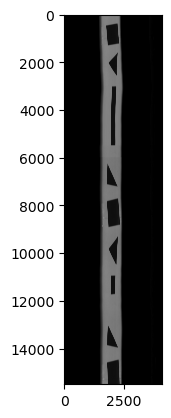

In [127]:
img = cv2.imread('output8.jpg')
#mask = np.zeros(img.shape, dtype=np.uint8)
plt.imshow(img)


# get width and height
height, width = img.shape[:2]
  
# display width and height
print("The height of the image is: ", height)
print("The width of the image is: ", width)

# Convert image to grayscale

True

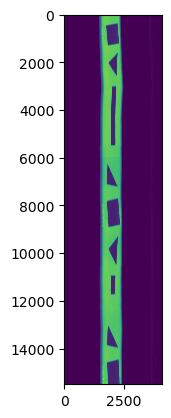

In [128]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray)

cv2.imwrite('gray.jpeg', gray)  

#  Threshold the image to create a binary image

True

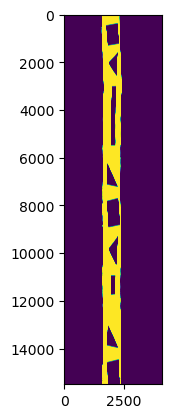

In [129]:
src, thresh = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)
plt.imshow(thresh)
cv2.imwrite('threshold.jpeg', thresh)  
# src, threshold = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)

# plt.imshow(threshold)
# cv2.imwrite('threshold.jpeg', threshold)  

# Find the contours in the binary image

In [130]:
# contours, src = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Find the contours in the binary image
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw Contours

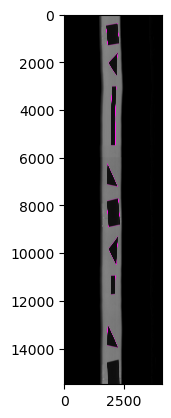

In [131]:
# Filter contours based on their size
filtered_contours = []

for contour in contours:
    area = cv2.contourArea(contour)
    
    if area > 80000 and area < 600000:
        filtered_contours.append(contour)
        
# Draw the filtered contours on the original image
img1 = cv2.drawContours(img, filtered_contours, -1, (255, 23, 232), 10)

# Show the resulting image
#cv2.imshow('ContoursWewant', img)
cv2.imwrite('ContoursWewant.jpeg', img1)  
plt.imshow(img1)
#plt.imshow(img)
##cv2.destroyAllWindows()

# Count, Name, Create Folder, Save 

There are 4 triangles , 4 quadrilaterals , 0 hexagons


,Triangle Number,Width,Height,Area,Time
Contour,,,,,
0,1,460,946,213357.0,"Date 20-02-2023, Time17-08-41"
2,2,392,1193,228878.0,"Date 20-02-2023, Time17-08-41"
4,3,459,957,210652.0,"Date 20-02-2023, Time17-08-41"
6,4,383,950,180626.5,"Date 20-02-2023, Time17-08-41"


,Quadrilaterial Number,Width,Height,Area,Time
Contour,,,,,
1,1,201,803,146476.5,"Date 20-02-2023, Time17-08-41"
3,2,556,1214,546735.5,"Date 20-02-2023, Time17-08-41"
5,3,230,2481,455427.0,"Date 20-02-2023, Time17-08-41"
7,4,549,924,413726.0,"Date 20-02-2023, Time17-08-41"


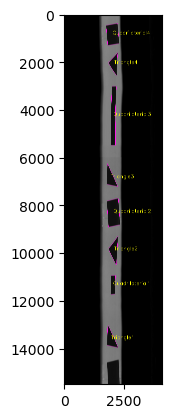

In [138]:
img2 = cv2.imread('ContoursWewant.jpeg')


trianglecount = 0
quadrilaterialcount = 0
hexagoncount = 0

#current_time = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
current_time = datetime.datetime.now().strftime("Date %d-%m-%Y, Time%H-%M-%S")
#ilename = f"triangle_{i+1}_{current_time}.jpg"

#df = pd.DataFrame(data = None, index = ' Triangle Quadrilateral'.split(), columns = ' number width height area'.split())
df1 = pd.DataFrame(columns=[ 'Triangle Number', 'Width', 'Height', 'Area', 'Time'])
df2 = pd.DataFrame(columns=[ 'Quadrilaterial Number', 'Width', 'Height', 'Area','Time'])

# Write the name of each contour at its center
for i, contour in enumerate(filtered_contours):
    

    
    # Calculate the center of the contour
    M = cv2.moments(contour)
    center_x = int(M['m10'] / M['m00'])
    center_y = int(M['m01'] / M['m00'])
    center = (center_x, center_y)
    #print(i)  0 1 2 3 4 5 6 7 8 9
    
    
    # Approximate the contour with a polygon
    epsilon = 0.01 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)
    
    # Determine the shape based on the number of vertices
    shape = ''
    if len(approx) == 3:
        
        shape = 'Triangle'    
        trianglecount +=  1     
        cv2.putText(img, shape + str(trianglecount) , center, cv2.FONT_HERSHEY_SIMPLEX, 7, (255, 255, 0), 10)
        x, y, w, h = cv2.boundingRect(contour)
        width = w
        height = h
        area = cv2.contourArea(contour)
        # Print the width, height, and area of the contour
        #print(f'Triangle {trianglecount}: Width = {width} pixels, Height = {height} pixels, Area = {area} pixels')       
        #print('\n')       

        df1.index.rename('Contour', inplace=True)
        df1.loc[i] = [trianglecount ,w, h, area,current_time]
        
        
        # Name of triangle folder created
        folder_name = "triangle_folder"
        # Check if the folder already exists, and create it if it doesn't
        if not os.path.exists(folder_name):
            os.mkdir(folder_name)

        # Extract the contour as a separate image
        contour_img = img2[y:y+h, x:x+w]     #img2
        # Save the contour as a new image
        #cv2.imwrite(f"triangle_{i+1}.jpg", contour_img)

        cv2.imwrite(os.path.join(folder_name, f"triangle_{i+1}.jpg"), contour_img)
        
        
        
    elif len(approx) == 4:
        shape = 'Quadrilaterial'
        quadrilaterialcount += 1
        cv2.putText(img, shape + str(quadrilaterialcount) , center, cv2.FONT_HERSHEY_SIMPLEX, 7, (255, 255, 0), 10)
        x, y, w, h = cv2.boundingRect(contour)
        width = w
        height = h
        area = cv2.contourArea(contour)
        # Print the width, height, and area of the contour
        #print(f'Quadrilaterial {quadrilaterialcount}: Width = {width} pixels, Height = {height} pixels, Area = {area} pixels')   
        #print("\n") 
              
        df2.index.rename('Contour', inplace=True)
        df2.loc[i] = [quadrilaterialcount ,w, h, area,current_time]

        # Name of the quadrilaterial folder created
        folder_name = "quadrilaterial_folder"
        # Check if the folder already exists, and create it if it doesn't
        if not os.path.exists(folder_name):
            os.mkdir(folder_name)
     
             
        # Extract the contour as a separate image
        contour_img = img2[y:y+h, x:x+w]     #img2
        # Save the contour as a new image
        cv2.imwrite(os.path.join(folder_name, f"quadrilaterial_{i+1}.jpg"), contour_img)
    
            
            
            
            
            
            
    elif len(approx) == 6:
        cv2.putText(img, 'Hexagon', (x, y),
                cv2.FONT_HERSHEY_SIMPLEX, 3, (255, 150, 255), 5)
        hexagoncount += 1
        cv2.putText(img, shape + str(hexagoncount) , center, cv2.FONT_HERSHEY_SIMPLEX, 7, (255, 255, 0), 10)
    
    
    else:
        cv2.putText(img, 'Circle', (x, y),
        cv2.FONT_HERSHEY_SIMPLEX, 3, (255, 0, 255), 5)
        
        
        
        
    # Write the shape of the contour at its center
    #cv2.putText(img, shape, center, cv2.FONT_HERSHEY_SIMPLEX, 10, (255, 255, 0), 25)

print('There are {one} triangles , {two} quadrilaterals , {three} hexagons'
      .format(one=trianglecount, two = quadrilaterialcount , three = hexagoncount))
    

    

    
    
    
cv2.imwrite('ContoursNamed.jpeg', img)  
plt.imshow(img)
#plt.imshow(img1)
# concatenate the two dataframes horizontally
#result = pd.concat([df1, df2], axis=1)

#result

display(df1)
display(df2)
#df1 = df.round(2)
#df2 = df2.round(2)
#display(df1.style.set_caption('Triangle'))
#display(df2.style.set_caption('Quadrilaterial'))